# Learning Python Data Analysis

## Analyzing Data from Multiple Files

Setup: https://swcarpentry.github.io/python-novice-inflammation/instructor/index.html#setup

Instruction: https://swcarpentry.github.io/python-novice-inflammation/instructor/06-files.html

Objectives:
* Use a library function to get a list of filenames that match a wildcard pattern.
* Write a loop to process multiple files.

In [2]:
# Let's list all the files in our data directory starting with 'inflammation-', and ending with '.csv'

# The 'glob' library contains a function (also called glob) to help us finds files and directories whose names match a pattern
import glob

print(glob.glob('data/inflammation*.csv'))

# Notice the files are not in order

['data/inflammation-05.csv', 'data/inflammation-11.csv', 'data/inflammation-10.csv', 'data/inflammation-04.csv', 'data/inflammation-12.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-03.csv', 'data/inflammation-02.csv', 'data/inflammation-01.csv', 'data/inflammation-09.csv', 'data/inflammation-08.csv']


data/inflammation-01.csv


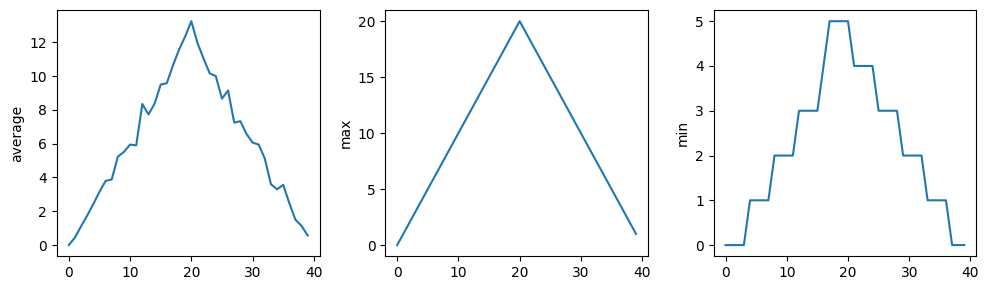

data/inflammation-02.csv


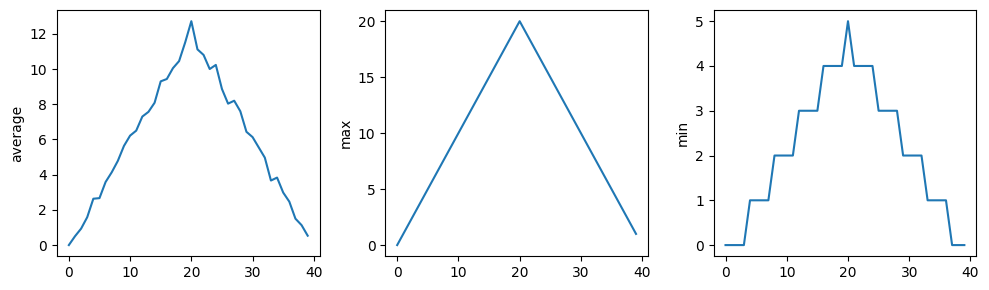

data/inflammation-03.csv


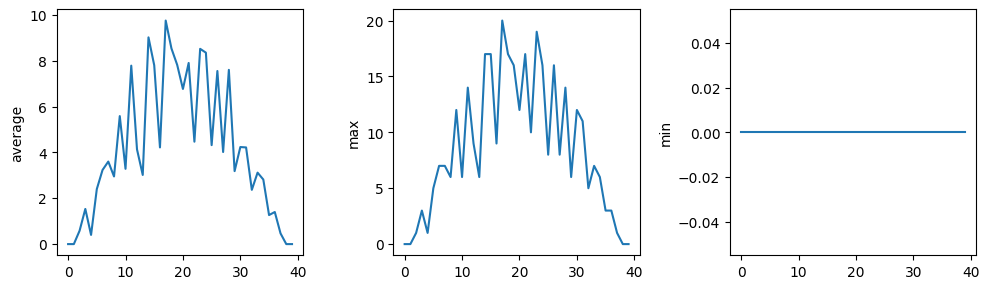

In [4]:
# Let's sort the files and create plots of the first 3

import glob
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
for filename in filenames:
    print(filename)

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

The plots generated for the second clinical trial file look very similar to the plots for the first file: their average plots show similar “noisy” rises and falls; their maxima plots show exactly the same linear rise and fall; and their minima plots show similar staircase structures.

The third dataset shows a much noisier average and maxima plots that are far less suspicious than the first two datasets; however, the minima plot shows that the third dataset minima is consistently zero across every day of the trial. 

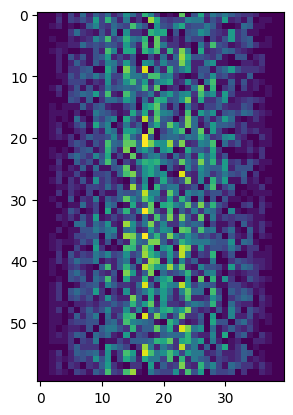

In [5]:
# If we produce a heat map for the third data file we see the following:

# Zero values sporadically distributed across all patients and days of the clinical trial, 
# suggesting that there were potential issues with data collection throughout the trial.

# In addition, we can see that the last patient in the study didn’t have any inflammation flare-ups 
# at all throughout the trial, suggesting that they may not even suffer from arthritis!

image = matplotlib.pyplot.imshow(numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=','))
matplotlib.pyplot.show()

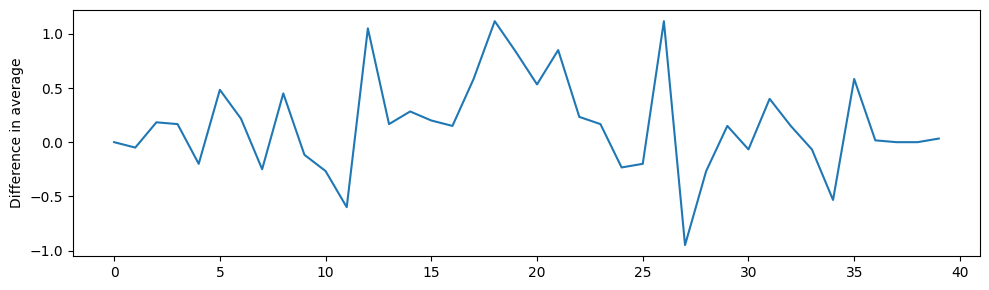

In [7]:
# Plot the difference between the average inflammations reported in the first and second dataset
import glob
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/inflammation*.csv'))

data0 = numpy.loadtxt(fname=filenames[0], delimiter=',')
data1 = numpy.loadtxt(fname=filenames[1], delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

matplotlib.pyplot.ylabel('Difference in average')
matplotlib.pyplot.plot(numpy.mean(data0, axis=0) - numpy.mean(data1, axis=0))

fig.tight_layout()
matplotlib.pyplot.show()

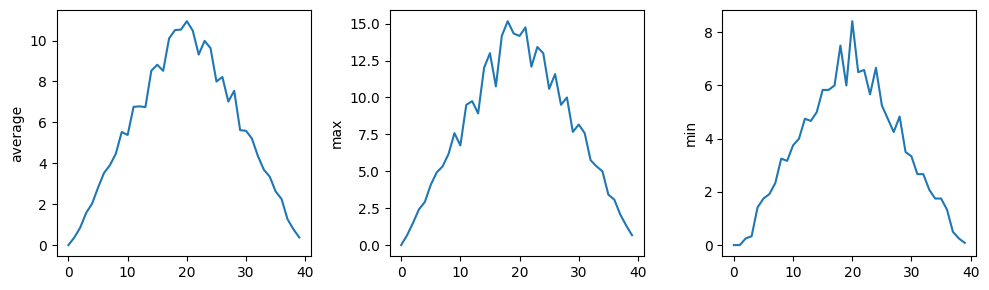

In [9]:
# Use each of the files once to generate a dataset containing values averaged over all patients

import glob
import numpy
import matplotlib.pyplot

filenames = glob.glob('data/inflammation*.csv')
composite_data = numpy.zeros((60, 40))

for filename in filenames:
    data = numpy.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data

composite_data = composite_data / len(filenames)

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.amax(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.amin(composite_data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()